***TP FINAL MATEMATICA III 2024***

**ALUMNO TRIPODI DANTE**


DATASET elegido = https://www.kaggle.com/datasets/danushkhanna/dataset-fullcsv

**INFORMACION DEL DATA SET ELEGIDO**

Este conjunto de datos es un recurso valioso para la detección y análisis de dominios de phishing en URLs. Consiste en una variedad de características extraídas de las URLs para ayudar en la identificación de posibles intentos de phishing. Con múltiples características que capturan diversas características de las URLs, este conjunto de datos ofrece una vista integral de atributos frecuentemente asociados con actividades de phishing

In [15]:
#IMPORTANDO LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#from pycaret.classification import *

IMPORTANDO Y LEYENDO EL DATA SET

In [16]:
df=pd.read_csv('dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


VISUALIZANDO LA DISTRIBUCION DEL CONJUNTO DE DATOS

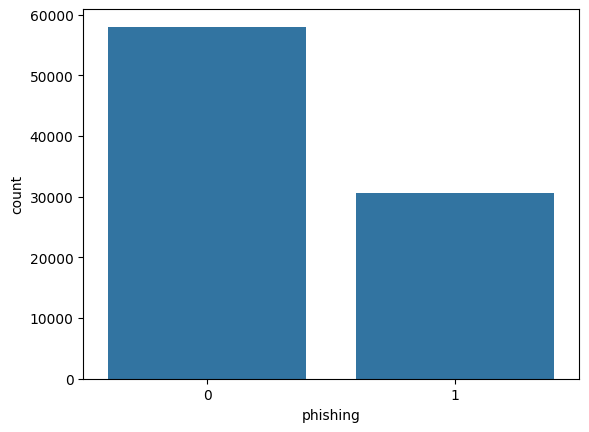

In [17]:
sns.countplot(x='phishing', data=df)
plt.show()

In [18]:
#VEMOS TODAS LAS COLUMNAS DE MI DATASET
print(df.columns)

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)


In [19]:
#ELIMINAMOS LAS COLUMNAS QUE NO NOS SIRVEN
cols_to_drop = ['url_google_index',
                  'domain_google_index',
                  'qty_vowels_domain',
                  'server_client_domain',
                  'tld_present_params',
                  'time_response', 
                  'domain_spf', 
                  'qty_ip_resolved', 
                  'qty_nameservers', 
                  'qty_mx_servers', 
                  'ttl_hostname', 
                  'url_shortened']

df=df.drop(cols_to_drop, axis=1)

LIMPIAMOS Y ANALIZAMOS LOS DATOS, PARA PODER VISUALIZARLOS 

In [20]:
rows, columns = df.shape

original_features = list(df.columns)

dataset_array = np.array(df)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
  if attribute == 'domain':
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)
    
    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

df1 = pd.DataFrame(new_dataset).astype(int)
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,8,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,42,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,1,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,62,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,48,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,1,0,-1,0,47583,-1,-1,1,0,1,2


En el bloque de codigo anterior lo que se busco crear un nuevo DataFrame df1 mas limpio y ordenando el cual podamos usar para trabajar de manera mas sencilla.

Nos aseguramos  de que todos los valores sean enteros.

y establecimos  que todos los valores menores que -1 sean iguales a -1.


ANALIZAMOS LAS CORRELACIONES DE LOS DATOS CON EL METODO DE PEARSON

In [21]:
correlaciones = df1.corr(method="pearson")

#tablita
correlaciones

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
length_url,1.000000,0.127817,0.013114,0.645046,0.416752,0.836753,0.251283,0.018416,-0.202164,-0.077349,-0.026460,-0.042922,0.449771,-0.007030
domain_length,0.127817,1.000000,-0.037586,-0.017743,-0.017328,-0.007329,-0.010760,-0.026017,-0.134112,-0.101161,-0.006179,-0.045063,0.009736,0.555000
domain_in_ip,0.013114,-0.037586,1.000000,0.027753,0.013709,0.004108,-0.006514,-0.005145,-0.040853,-0.028132,-0.048290,-0.017889,0.058101,0.057764
directory_length,0.645046,-0.017743,0.027753,1.000000,0.685310,0.159445,0.140095,0.030956,-0.215052,-0.062806,-0.016483,-0.008365,0.525694,-0.105737
file_length,0.416752,-0.017328,0.013709,0.685310,1.000000,0.078641,0.060630,0.013947,-0.121585,-0.032850,0.011882,0.029125,0.255057,-0.044911
params_length,0.836753,-0.007329,0.004108,0.159445,0.078641,1.000000,0.231760,0.008048,-0.096837,-0.040204,-0.020954,-0.044239,0.232992,-0.041832
email_in_url,0.251283,-0.010760,-0.006514,0.140095,0.060630,0.231760,1.000000,0.025840,-0.071312,-0.019440,-0.020516,-0.033024,0.187812,-0.065838
asn_ip,0.018416,-0.026017,-0.005145,0.030956,0.013947,0.008048,0.025840,1.000000,-0.023435,-0.014937,-0.001470,0.017999,0.091654,-0.010777
time_domain_activation,-0.202164,-0.134112,-0.040853,-0.215052,-0.121585,-0.096837,-0.071312,-0.023435,1.000000,0.398820,0.062162,0.133949,-0.441875,-0.009578
time_domain_expiration,-0.077349,-0.101161,-0.028132,-0.062806,-0.032850,-0.040204,-0.019440,-0.014937,0.398820,1.000000,0.090065,0.084400,-0.165915,-0.076116


VEMOS CON UN MAPA DE CALOR LA CORRELACION ENTRE LAS VARIABLES DE MI DATA FRAME 

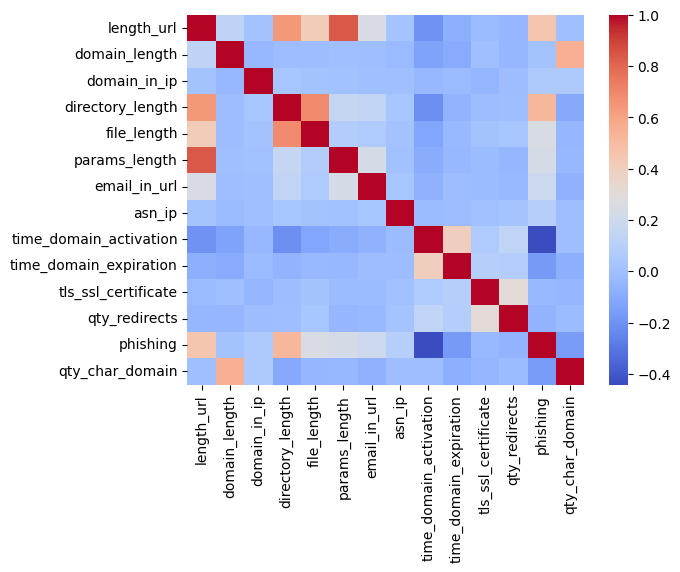

In [22]:
#mapa de calor
sns.heatmap(correlaciones, cmap='coolwarm')
plt.show()

VEMOS CON UN MAPA DE CALOR LA CORRELACION ENTRE LAS VARIABLES DE MI DATA FRAME PERO CON VALORES NUMERICOS

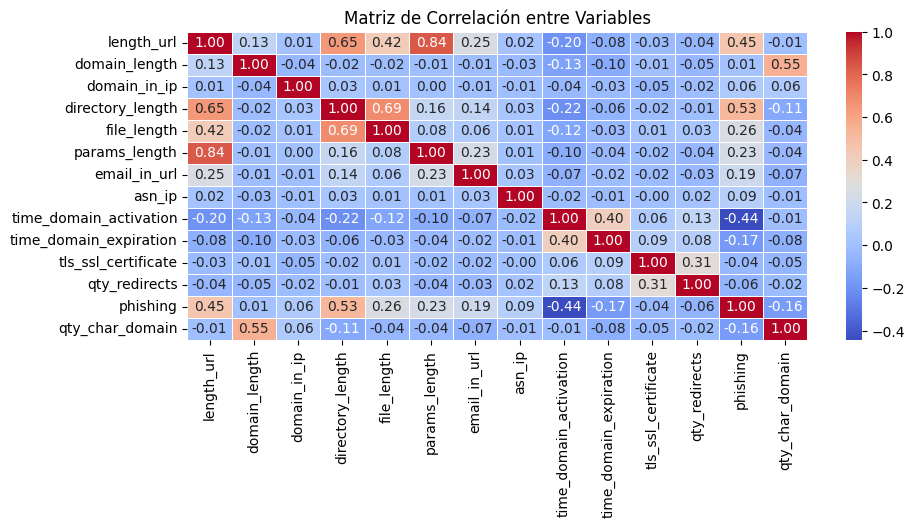

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Analizando el grafico  puedo ver que las  variables no estan correlacionadas muy fuertemente  con la variable que me interesa que es la de "phishing".
Pero haciendo varias pruebas decidi elejir trabajar con todas para el entrenamiento de mi red neuronal

RESUMEN ESTADISTICO DEL DATASET

In [24]:
df1.describe() # Resumen estadistico

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,36.347615,18.560820,0.002267,10.857694,2.743793,5.273185,0.018331,31131.152763,3389.676661,352.043250,0.506447,0.343903,0.345720,1.985967
std,46.191590,6.598694,0.047564,24.352634,13.572252,34.937007,0.134147,45261.502645,3044.165723,598.264801,0.499961,0.783892,0.475605,0.836865
min,4.000000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,17.000000,14.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,13335.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,2.000000
50%,22.000000,18.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,20013.000000,3046.000000,168.000000,1.000000,0.000000,0.000000,2.000000
75%,38.000000,22.000000,0.000000,16.000000,0.000000,-1.000000,0.000000,34922.000000,6423.000000,354.000000,1.000000,1.000000,1.000000,2.000000
max,4165.000000,231.000000,1.000000,1286.000000,1232.000000,4094.000000,1.000000,395754.000000,17775.000000,22574.000000,1.000000,17.000000,1.000000,30.000000


Muestro histogramas de las variables de entrada para vizualizar valores atípicos

array([[<Axes: title={'center': 'length_url'}>,
        <Axes: title={'center': 'domain_length'}>,
        <Axes: title={'center': 'domain_in_ip'}>,
        <Axes: title={'center': 'directory_length'}>],
       [<Axes: title={'center': 'file_length'}>,
        <Axes: title={'center': 'params_length'}>,
        <Axes: title={'center': 'email_in_url'}>,
        <Axes: title={'center': 'asn_ip'}>],
       [<Axes: title={'center': 'time_domain_activation'}>,
        <Axes: title={'center': 'time_domain_expiration'}>,
        <Axes: title={'center': 'tls_ssl_certificate'}>,
        <Axes: title={'center': 'qty_redirects'}>],
       [<Axes: title={'center': 'phishing'}>,
        <Axes: title={'center': 'qty_char_domain'}>, <Axes: >, <Axes: >]],
      dtype=object)

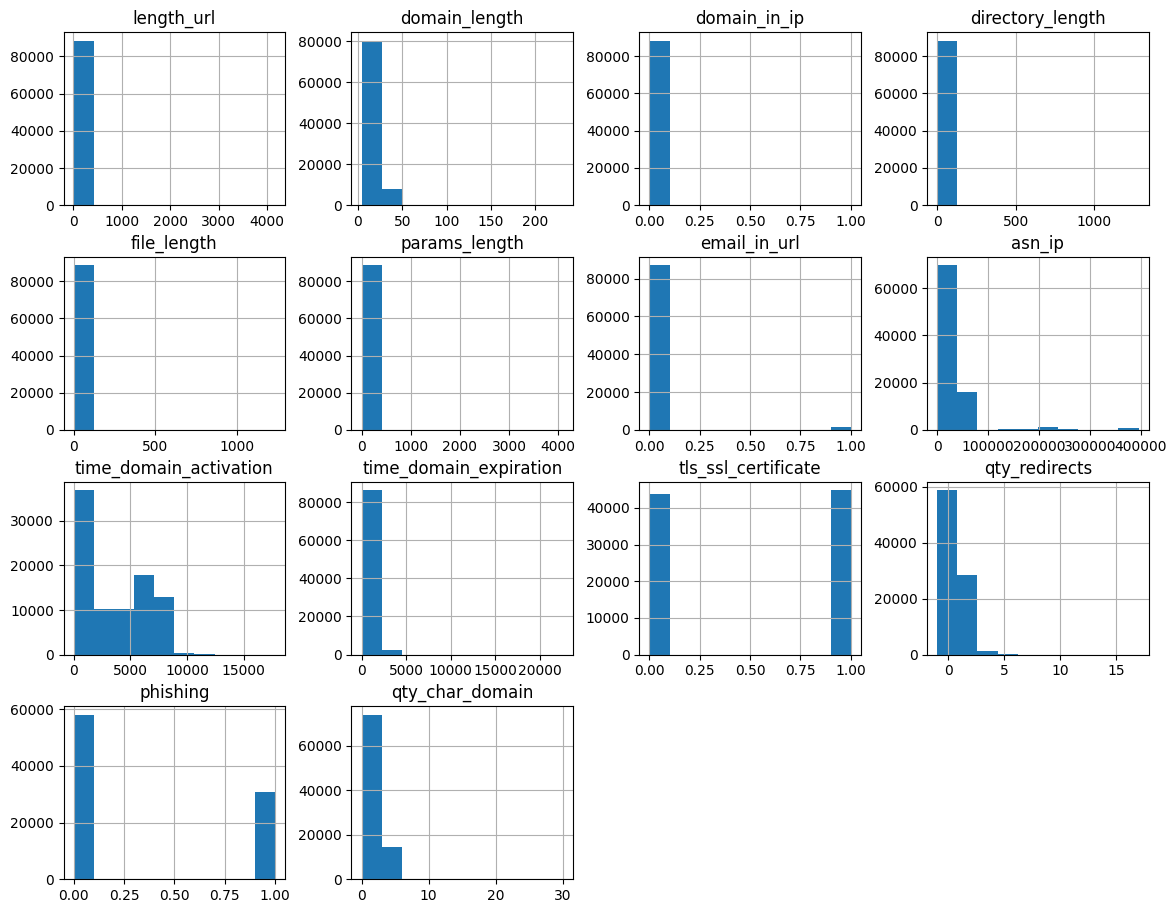

In [25]:
df1.hist(figsize=(14, 11))

Puedo ver que los datos de mis variables no presentan valores atipicos que me puedan llegar a molestar en el entrenamiento

In [26]:
#NORMALIZO MIS DATOS 
column = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","phishing","qty_char_domain"]

df1[column]=df1[column] / df1[column].max()

df1.describe()

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,0.008727,0.080350,0.002267,0.008443,0.002227,0.001288,0.018331,0.078663,0.190699,0.015595,0.506447,0.020230,0.345720,0.066199
std,0.011090,0.028566,0.047564,0.018937,0.011016,0.008534,0.134147,0.114368,0.171261,0.026502,0.499961,0.046111,0.475605,0.027895
min,0.000960,0.017316,0.000000,-0.000778,-0.000812,-0.000244,0.000000,-0.000003,-0.000056,-0.000044,0.000000,-0.058824,0.000000,0.000000
25%,0.004082,0.060606,0.000000,-0.000778,-0.000812,-0.000244,0.000000,0.033695,-0.000056,-0.000044,0.000000,0.000000,0.000000,0.066667
50%,0.005282,0.077922,0.000000,-0.000778,-0.000812,-0.000244,0.000000,0.050569,0.171364,0.007442,1.000000,0.000000,0.000000,0.066667
75%,0.009124,0.095238,0.000000,0.012442,0.000000,-0.000244,0.000000,0.088242,0.361350,0.015682,1.000000,0.058824,1.000000,0.066667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


	PARTE 2 DEL TRABAJO PRACTICO-ENTRENAMIENTO DE LA RED
	**Fordward Propagation**

In [27]:
from sklearn.model_selection import train_test_split

features = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","qty_char_domain"]

X = df1[features].values
Y = df1["phishing"].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)

# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(13, 13)
w_output = np.random.rand(1, 13)

b_hidden = np.random.rand(13, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion (Leaky ReLU y Logistic)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions <= .5).flatten().astype(int),Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

print("ACCURACY: ", accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')

59098
ACCURACY:  0.6531862330364602
Accuracy: 65.32%


Aplicamos  el método Descenso de Gradiente Estocástico  para el entrenamiento de la red Neuronal

In [36]:

L = 0.01  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(60000):
    # Seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # Distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


    # Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales

print("ACCURACY: ", accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')

# El valor de precisión (accuracy) es  (mayor q el anterior) indica la proporción de predicciones correctas realizadas 
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente. 

ACCURACY:  0.9065619817929541
Accuracy: 90.66%


COMPARACION CON SKLEARN


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

features = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","qty_char_domain"]

X = df1[features].values
Y = df1["phishing"].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Crear el modelo
nn = MLPClassifier(solver='adam',
                   hidden_layer_sizes=(100, ),
                   activation='relu',
                   max_iter=100000,
                   learning_rate_init=0.01,
                   alpha=0.0001)

# Entrenar el modelo
nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
#print("Pesos de las capas:", nn.coefs_)
#print("Sesgos de las capas:", nn.intercepts_)

# Evaluar el modelo
train_score = nn.score(X_train, Y_train)
test_score = nn.score(X_test, Y_test)
print("Puntaje del conjunto de entrenamiento: %f" % train_score)
print("Puntaje del conjunto de prueba: %f" % test_score)
print(f'Puntaje del conjunto de entrenamiento: {train_score * 100:.2f}%')
print(f'Puntaje del conjunto de prueba: {test_score * 100:.2f}%')


Puntaje del conjunto de entrenamiento: 0.953738
Puntaje del conjunto de prueba: 0.947782
Puntaje del conjunto de entrenamiento: 95.37%
Puntaje del conjunto de prueba: 94.78%


Scikit-learn es una biblioteca de código abierto de machine learning (aprendizaje automático) para el lenguaje de programación Python. 

Es una herramienta popular y ampliamente utilizada por su simplicidad y eficiencia. Scikit-learn proporciona una amplia gama de herramientas para análisis de datos y modelado predictivo.

Teniendo en cuenta eso y viendo que con esta bibloteca llegamos a un puntaje del 95.33% en conjunto de entrenamientoy un  94.73% en el conjunto de prueba.
Y nosotros llegamos a un 90%  aplicando el metodo Descenso de Gradiente Estocástico 

Podemos deducir que se llegar un entrenamiento correcto y un entrenamiento eficaz sin la necesidad de usar herramientas externas 